<h2><center>Predicción de muertes por fallas cardiacas</center></h2>

<p style='text-align: justify;'>Debido a los avances que ha logrado el mundo en la sanidad pública se han disminuido sustancialmente las enfermedades infecciosas. Esta proesa ha traido nuevos retos; atender las nuevas enfermedades predominantes, las crónico-degenerativas no infecciosas.</p>

<p style='text-align: justify;'>La primera causa de muerte en el mundo es una de ellas, la enfermedad cardiovascular. Los países realizan múltiples esfuerzos  para intentar combatirla pues muchas de las causas que la provocan son de carácter prevenible: alimentación, sobrepeso, obesidad, tabaco, drogas, sedentarismo, etc.</p>

<p style='text-align: justify;'>La estadística indica que 3 de cada 10 personas que fallecen, mueren debido a enfermedades del corazón. Su abordaje es necesariamente multidisciplinario y las tecnologias de la información tienen un gran valor que aportar a esta tarea. Conocer los diferentes factores que inciden en su complicación más común: la falla cardíaca, permite dar a los hospitales y sistemas de salud mejores herramientas para tomar decisiones sobre pacientes graves.</p>

<p style='text-align: justify;'>Con la siguiente información que se te presenta serás capaz de estudiar las variables relevantes para comprender la gravedad de cada paciente y poder establecer algoritmos y rutas de decisión mucho más precisas que ayuden a mejorar la sobrevida de las personas.</p>


<p style='text-align: justify;'>Compartiendo la siguiente cita, de la cual se obtiene de la base de datos.</p>

<p style='text-align:center;'><strong>Larxel. (2020). <em>Heart Failure Prediction</em>. Kaggle. <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data" target="_blank">https://www.kaggle.com/andrewmvd/heart-failure-clinical-data</a></strong></p>

<p style='text-align: justify;'>Compartiendo el artículo desde el cual se obtuvo la base de datos original; es un estudio desde el cual se utilizan métodos de aprendizaje máquina para la predicción de fallas cardiacas con base en estudios de creatinina sérica y fracción de eyección.</p>

<p style='text-align:center;'><strong>Chicco, D., &amp; Jurman, G. (2020). <em>Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.</em> BMC Medical Informatics and Decision Making. <a href="https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5" target="_blank">https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5</a></strong></p>

In [1]:
# Librerias ha utilizar
import pandas as pd
import numpy as np
from numpy.random import seed
seed(30) 

from sklearn.preprocessing import MinMaxScaler

import tensorflow
tensorflow.random.set_seed(30) 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
    
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
#Tomaremos una muestra probabilistica
df = df.sample(frac=1) 

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
13,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,11,1
246,55.0,0,2017,0,25,0,314000.0,1.1,138,1,0,214,1
35,69.0,0,582,1,35,0,228000.0,3.5,134,1,0,30,1
139,50.0,0,1548,0,30,1,211000.0,0.8,138,1,0,108,0
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201,0


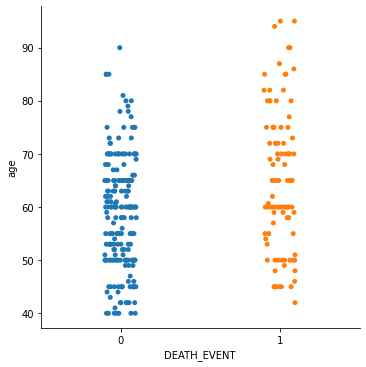

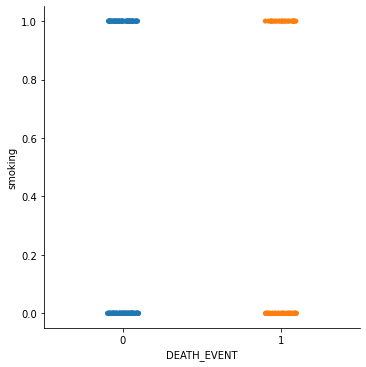

In [33]:
import seaborn as sns
sns.catplot(x="DEATH_EVENT", y="age", data=df)
sns.catplot(x="DEATH_EVENT", y="smoking", data=df)

In [5]:
#Separamos los datos de variables independientes y dependientes
X = df.drop("DEATH_EVENT",axis=1)
y = df.DEATH_EVENT

In [37]:
#Ajustamos los datos 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

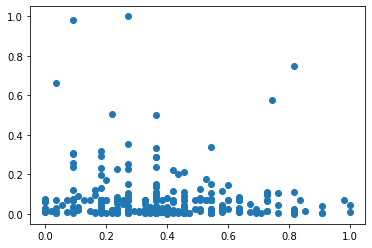

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x=X[:,0]
y=X[:,2]

plt.scatter(x,y)
plt.show()

In [7]:
#Separamos los datos en entrenamiento y prueba
split = round(X.shape[0]*0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [16]:
#Se generara un modelo de red neuronal, con 5 capas ocultas dentro de cada capa tendra 20 neuronas
#Funcion de activacion Relu entre las capas ocultas
#Funcion de activacion sigmoide entre la ultima capa oculta y la capa de salida
#Learning rate de 10%
#Optimizador: Decenso del gradiente estocastico
#Funcion de perdida: Error promedio cuadratico
#Epoch: 600, batch:10

model = keras.Sequential([
    layers.Dense(20, activation='relu',input_shape=(12,)),    
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),   
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
 
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

model.fit(X_train, y_train, epochs=600, batch_size=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
21/21 [==============================] - 1s 2ms/step - loss: 0.2371
Epoch 2/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2226
Epoch 3/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2182
Epoch 4/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2158
Epoch 5/600
21/21 [==============================] - 0s 3ms/step - loss: 0.2147
Epoch 6/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2132
Epoch 7/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2111
Epoch 8/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2100
Epoch 9/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2082
Epoch 10/600
21/21 [==============================] - 0s 2ms/step - loss: 0.2047
Epoch 11/600
21/21 [==============================] - 0s 2ms/step - loss: 0.1982
Epoch 12/600
21/21 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 13/600
21/21 [=================

In [17]:
y_hat_train = model.predict(X_train).round()
y_hat_test = model.predict(X_test).round()

In [18]:
from sklearn.metrics import confusion_matrix
cf =  confusion_matrix(y_test,y_hat_test)

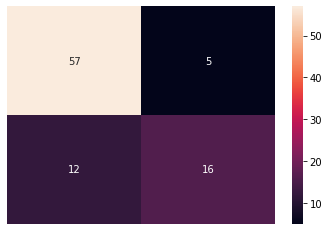

In [20]:
import seaborn as sns
sns.heatmap(cf, annot=True, xticklabels=False, yticklabels=False)

## Comentando los Resultados

La matriz de confucion nos dice que la red predijo 73 casos de manaera correcta 57 fueron verdaderos positivos, es decir, la red predijo la defunción de alguien y acerto, 16 veces la red predijo la no defunción de alguien y acerto.
Por otro lado la red se equivoco 17 veces, 12 predijo la no defunción de alguien y se equivoco y 5 veces la predijo la defuncion de alguien y se equivoco.